> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 4.2 - APIs


## Exercícios 🔭🌌🪐

Vamos acessar as APIs da NASA para ver algumas imagens interessantes capturadas universo afora!

#### Q1.
Crie uma chave no site oficial:
* https://api.nasa.gov

Vamos armazenar a chave de forma segura! <br>
Salve a sua chave em um arquivo `key.json` na forma:
`API_KEY=SUA_CHAVE`

Adicione o nome do arquivo `key.json` ao `.gitignore` do repositório que você fará upload da atividade.
Para isso basta abrir o arquivo `.gitignore` na pasta raíz do repositório (ou criar um caso ele não exista). Dentro do arquivo, apenas adiciona o nome do arquivo que deseja ignorar.

#### Q2. 🛰 Astronomy Picture of the Day (APOD) 🌌
> Antes de fazer os exercícios, devo te lembrar que existem limites de acesso às APIs, descritas na página principal, portanto pega leve na tentativa e erro na hora de testar seu código.

<img width=500 src=https://apod.nasa.gov/apod/image/2407/M24-HaLRGB-RC51_1024.jpg>

A primeira API que acessaremos é a mais popular de todas: astronomy picture of the day (foto astronômica do dia).

Faça uma requisição GET para a URL da API que retorna a imagem do dia! Essa é fácil já que são os valores padrão da rota principal:
* URL base: `'https://api.nasa.gov/planetary/apod'`
* Endpoint: não precisa preencher, acessaremos a raíz da API.
* Query params: preencha `api_key` com a sua chave de autenticação. Se animar mexer em outros parâmetros veja [a documentação](https://api.nasa.gov).

Ao receber a resposta (um json), você deve:
* Imprimir os campos `copyright` e `explanation`
* Com as biblioteca scikit-images e matplotlib, apresente a imagem a partir do campo `url` ou `hdurl`, e preencha o título do plot com o campo `title` do json. Uma dica de código a seguir.
```python
from skimage import io
img = io.imread(url)
## plot a matriz img com matplotlib (imshow)
```   

Copyright: 
Brian Meyers

Explanation: Ten thousand years ago, before the dawn of recorded human history, a new light would suddenly have appeared in the night sky and faded after a few weeks.  Today we know this light was from a supernova, or exploding star, and record the expanding debris cloud as the Veil Nebula, a supernova remnant.  This sharp telescopic view is centered on a western segment of the Veil Nebula cataloged as NGC 6960 but less formally known as the Witch's Broom Nebula.  Blasted out in the cataclysmic explosion, an interstellar shock wave plows through space sweeping up and exciting interstellar material. Imaged with narrow band filters, the glowing filaments are like long ripples in a sheet seen almost edge on, remarkably well separated into atomic hydrogen (red) and oxygen (blue-green) gas. The complete supernova remnant lies about 1400 light-years away towards the constellation Cygnus. This Witch's Broom actually spans about 35 light-years. The bright star in the 

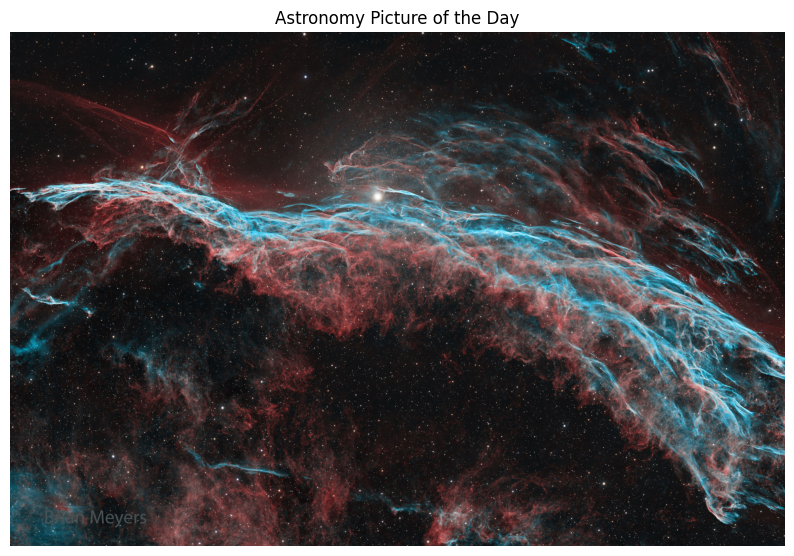

In [2]:
# Importando as bibliotecas necessárias
import requests
import json
from skimage import io
import matplotlib.pyplot as plt

# Carregando a chave da API do arquivo key.json
with open('key.json', 'r') as fp:
    auth = json.load(fp)
API_KEY = auth['API_KEY']

# Definindo a URL base e os parâmetros
BASE_URL = 'https://api.nasa.gov/planetary/apod'
params = {
    'api_key': API_KEY
}

# Fazendo a requisição GET
response = requests.get(BASE_URL, params=params)

# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    data = response.json()  # Convertendo a resposta para JSON
    
    # Imprimindo os campos solicitados
    print("Copyright:", data.get('copyright', 'Não disponível'))
    print("Explanation:", data['explanation'])
    
    # Carregando e exibindo a imagem
    url = data.get('hdurl', data['url'])  # Usa hdurl se disponível, senão url
    img = io.imread(url)
    
    # Plotando a imagem com o título
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.title(data['title'])
    plt.axis('off')  # Remove os eixos
    plt.show()
else:
    print(f"Erro na requisição: {response.status_code} - {response.reason}")

#### Q3. Limites
A partir da resposta da query anterios, imprima o header da resposta e consulte os atributos:
* X-RateLimit-Limit: o limite total de requisições da sua chave de API
* X-RateLimit-Remaining: o limite restante de requisições da sua chave de API

In [3]:
# Usando a resposta da requisição anterior (response)
headers = response.headers

# Imprimindo os limites
print("X-RateLimit-Limit:", headers['X-RateLimit-Limit'])
print("X-RateLimit-Remaining:", headers['X-RateLimit-Remaining'])

X-RateLimit-Limit: 4000
X-RateLimit-Remaining: 3968


### Q4. Mars Rover Photos 🚀🚙 📷

<img width=500 src=https://www.nasa.gov/wp-content/uploads/2019/10/pia23378-16.jpg>

Essa API retorna dados (incluindo imagens capturadas) sobre os veículos que hoje habitam o planeta Marte. São os rovers `opportunity`, `spirit` e o mais famoso, o `curiosity` (da foto acima).

Antes de requisitar imagens, vamos ver o relatório de dados coletados por um deles, o `curiosity`. Isso vai nos ajudar a montar a query de imagens coletadas.

Faça uma requisição GET para a seguinte URL:
* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* endpoint: `'/manifests/{nome_do_rover}'`
* query parameters: preencha `api_key` com a sua chave de autenticação.

Extraia o json da resposta retornada. O campo principal é o `'photo_manifest'`, do qual queremos acessar os seguintes valores:
* `max_sol`: Máximo "dia marciano" de coleta de fotos. O dia marciano tem 24 horas, 39 minutos e 35 segundos.
* `max_date`: Última data terrestre de coleta de fotos, na forma `'aaaa-mm-dd'`.

Imprima esses dois atributos da resposta e os use no próximo exercício para coletar as fotos mais recentes tiradas. 

In [4]:
# Importando as bibliotecas
import requests
import json

# Carregando a chave da API
with open('key.json', 'r') as fp:
    auth = json.load(fp)
API_KEY = auth['API_KEY']

# Definindo a URL base e o endpoint
BASE_URL = 'https://api.nasa.gov/mars-photos/api/v1'
rover = 'curiosity'
endpoint = f'/manifests/{rover}'
params = {
    'api_key': API_KEY
}

# Fazendo a requisição GET
response = requests.get(BASE_URL + endpoint, params=params)

# Verificando a resposta
if response.status_code == 200:
    data = response.json()
    photo_manifest = data['photo_manifest']
    
    # Extraindo e imprimindo os campos
    max_sol = photo_manifest['max_sol']
    max_date = photo_manifest['max_date']
    print("Max Sol:", max_sol)
    print("Max Date:", max_date)
else:
    print(f"Erro na requisição: {response.status_code} - {response.reason}")

Max Sol: 4677
Max Date: 2025-10-02


#### Q5.

Faça uma requisição GET para a URL da API que retorna links para as imagens coletadas pelos rovers.

* URL base: `'https://api.nasa.gov/mars-photos/api/v1'`
* Endpoint: `/rovers/{nome_do_rover}/photos`
* Query params sugeridos: 
    * `api_key`: sua chave de autenticação.
    * `sol`: dia marciano que deseja coletar (de 0 a `max_sol` coletado anteriormente)
    * `page`: você pode paginar entre as respostas! São retornados 25 resultados por página.

A resposta esperada estará no formato a seguir, uma lista no campo `'photos'` onde cada item é um dicionário com os dados da foto tirada. Dentre os dados há o campo `camera` indicando qual das câmeras do rover tirou a foto. As fotos mais interessantes (na minha opinião, claro) são das câmeras de navegação (`"name": "NAVCAM"`) e as de prevenção de colisão (frente: `"name": "FHAZ"` e trás `"name": "RHAZ"`) onde dá pra ver partes do robô!

**Seu trabalho é**:
* Paginar a requisição acima até que a resposta seja `None`
* Escolher uma ou mais câmeras (ex: `NAVCAM`, `FHAZ`, `RHAZ`), e em um laço de repetição plotar todas as imagens retornadas daquela câmera. Use novamente as bibliotecas scikit-image e matplotlib. 
  * O título da imagem deve ter a página da requisição, nome da câmera e id da imagem.

```json
{
    "photos": [
        {
            "id": 612417,
            "sol": 1600,
            "camera": {
                "id": 20,
                "name": "FHAZ",
                "rover_id": 5,
                "full_name": "Front Hazard Avoidance Camera"
            },
            "img_src": "http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01600/opgs/edr/fcam/FLB_539548779EDR_F0602928FHAZ00337M_.JPG",
            "earth_date": "2017-02-04",
            "rover": {
                "id": 5,
                "name": "Curiosity",
                "landing_date": "2012-08-06",
                "launch_date": "2011-11-26",
                "status": "active",
                "max_sol": 1912,
                "max_date": "2017-12-22",
                "total_photos": 328169,
                "cameras": [
                    ...
                ]
            }
        },
        {
            "id": 612418,
            "sol": 1600,
            "camera": {
                "id": 20,
                "name": "FHAZ",
                "rover_id": 5,
                "full_name": "Front Hazard Avoidance Camera"
            },
            "img_src": "http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01600/opgs/edr/fcam/FRB_539548779EDR_F0602928FHAZ00337M_.JPG",
            "earth_date": "2017-02-04",
            "rover": {
                "id": 5,
                "name": "Curiosity",
                "landing_date": "2012-08-06",
                "launch_date": "2011-11-26",
                "status": "active",
                "max_sol": 1912,
                "max_date": "2017-12-22",
                "total_photos": 328169,
                "cameras": [
                    ...
                ]
            }
        },
        ...
    ]
}

```



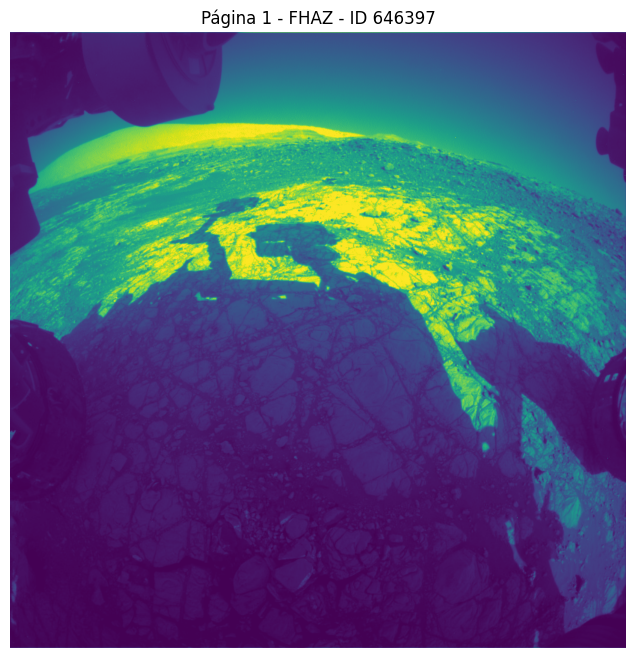

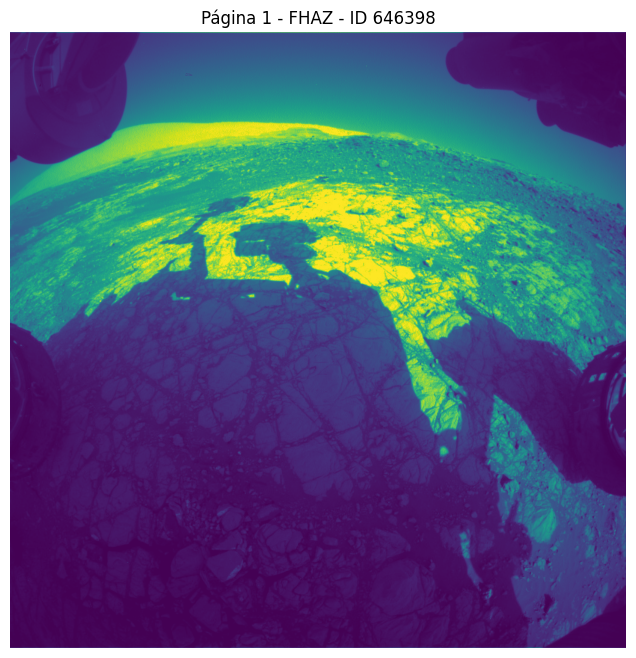

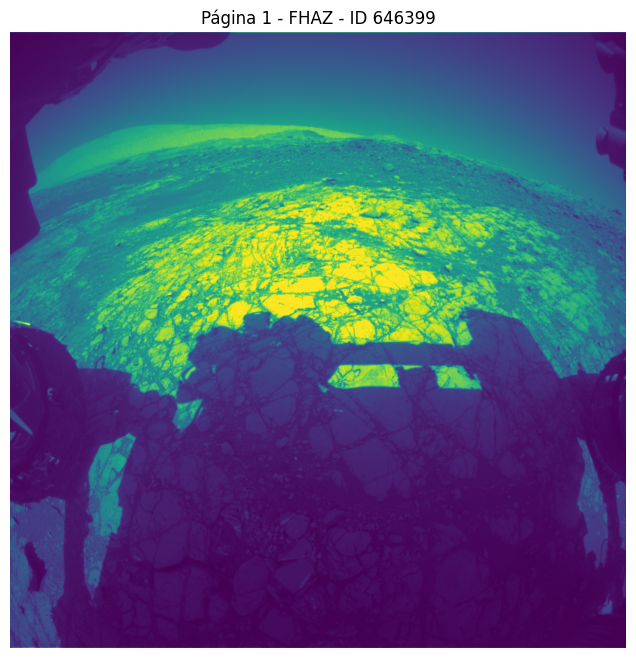

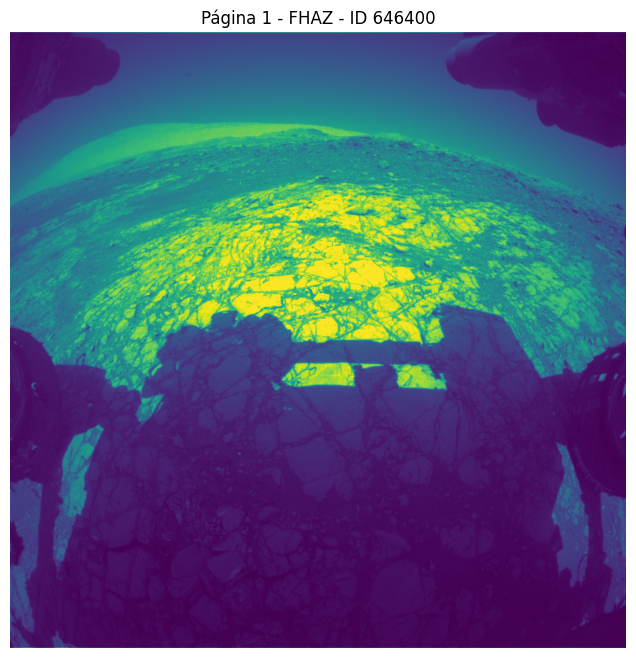

Sem mais fotos na página 4. Finalizando.


In [10]:
# Importando as bibliotecas
import requests
from skimage import io
import matplotlib.pyplot as plt

# Carregando a chave da API
with open('key.json', 'r') as fp:
    auth = json.load(fp)
API_KEY = auth['API_KEY']

# Definindo a URL base e o endpoint
BASE_URL = 'https://api.nasa.gov/mars-photos/api/v1'
rover = 'curiosity'
endpoint = f'/rovers/{rover}/photos'

# Parâmetros iniciais (usando max_sol da Q4, ajuste conforme o valor obtido)
max_sol = 1912  # Exemplo, substitua pelo valor real de max_sol da Q4
params = {
    'api_key': API_KEY,
    'sol': max_sol,
    'page': 1
}

# Escolhendo a câmera (ex.: NAVCAM)
camera_name = 'FHAZ'

# Loop de paginação
page = 1
while True:
    # Atualizando o parâmetro de página
    params['page'] = page
    
    # Fazendo a requisição
    response = requests.get(BASE_URL + endpoint, params=params)
    
    if response.status_code == 200:
        data = response.json()
        photos = data.get('photos', [])
        
        # Se não houver mais fotos, parar o loop
        if not photos:
            print(f"Sem mais fotos na página {page}. Finalizando.")
            break
        
        # Filtrando e plotando fotos da câmera escolhida
        for photo in photos:
            if photo['camera']['name'] == camera_name:
                img_url = photo['img_src']
                img_id = photo['id']
                
                # Carregando e plotando a imagem
                img = io.imread(img_url)
                plt.figure(figsize=(10, 8))
                plt.imshow(img)
                plt.title(f"Página {page} - {camera_name} - ID {img_id}")
                plt.axis('off')
                plt.show()
        
        # Incrementando a página
        page += 1
    else:
        print(f"Erro na requisição: {response.status_code} - {response.reason}")
        break